# Exercices de mise en pratique des concepts statistiques basiques, des  tests d'hypothèse, et de régression linéaire et corrélation

Ce notebook propose une série d'exercices de mise en pratique sur Python concernant des concepts statistiques basiques très utilisés en science des données et dans d'autres disciplines. L'objectif de ce notebook est d'appliquer les concepts développés en cours à l'aide des librairies Python, avec des algorithmes préconçus et, dans certains cas, de programmer les méthodes pour s'approprier les concepts. De la même manière que dans les sessions précédentes, le code doit être fourni dans les cellules après les énoncés et doit également être expliqué à l'aide de commentaires pertinents. 



## Estimations de parametrès statitiques descriptifs basiques (moyenne, mediane, quartiles)

### `Exercice 1`

Créer une fonction (utilisant la bibliothèque numpy) qui, à partir d'un ensemble de données, fournisse la moyenne, la médiane (utiliser la fonction nanmedian afin d'éviter les valeurs manquantes) et les quartiles (utiliser la fonction nanquantile) $Q_1=25%$, $Q_2=50%$ et $Q_3=75%$. Les résultats doivent être présentés dans un data frame. Pour tester la fonction, utilisez le jeu de données gas_prices.csv qui contient les prix du gaz de quelques pays.

- Comparez les valeurs obtenues aux valeurs retournées par la fonction pd.describe de la bibliothèque pandas. 
- Que remarquez-vous concernant ces valeurs ?

In [32]:
import numpy as np
import pandas as pd

def calculate_statistic(data):
    my_result = {
        'Country': [],
        'Mean': [],
        'Median': [],
        'Q1': [],
        'Q3': []
    }
    
    for column in data.columns[1:]:
        my_result['Country'].append(column)
        my_result['Mean'].append(np.nanmean(data[column]))
        my_result['Median'].append(np.nanmedian(data[column]))
        my_result['Q1'].append(np.nanquantile(data[column], 0.25))
        my_result['Q3'].append(np.nanquantile(data[column], 0.75))
    
    my_data_result = pd.DataFrame(my_result)
    return my_data_result

data = pd.read_csv('data/gas_prices.csv')

statistic = calculate_statistic(data)

print(statistic, '\n')


describe_my_result = data.describe()

print(describe_my_result)

       Country      Mean  Median     Q1      Q3
0    Australia  2.348889   1.955  1.780  2.5875
1       Canada  2.086842   1.730  1.590  2.1800
2       France  4.407895   3.870  3.605  4.7000
3      Germany  4.224737   3.530  3.370  4.9150
4        Italy  4.645789   4.390  3.805  4.9400
5        Japan  3.820526   3.640  3.270  4.3200
6       Mexico  1.781579   1.790  1.475  2.2100
7  South Korea  3.835789   3.760  2.910  4.3450
8           UK  4.392632   4.130  3.135  5.1300
9          USA  1.592105   1.230  1.145  1.7350 

              Year  Australia     Canada     France    Germany      Italy  \
count    19.000000  18.000000  19.000000  19.000000  19.000000  19.000000   
mean   1999.000000   2.348889   2.086842   4.407895   4.224737   4.645789   
std       5.627314   0.845931   0.786618   1.167531   1.425749   1.146610   
min    1990.000000   1.630000   1.380000   3.410000   2.650000   3.570000   
25%    1994.500000   1.780000   1.590000   3.605000   3.370000   3.805000   
50%    1

## Distributions de dénsité de probabilité 

### `Exercice 2`
Créer les courbes des distributions normale, $t$, et binomiale en utilisant la bibliothèque SciPy. Les distributions doivent présenter les caractéristiques suivantes:

- Pour la distribution normale, créez un échantillon aléatoire(en utilisant numpy) normal de 1000 éléments, calculez la moyenne $\mu$ et l'écart-type $\sigma$. Ensuite, obtenez le graphique de la distribution normale entre $-3\sigma$ et $3\sigma$
- Pour la distribution $t$, utilisez le même échantillon obtenu précédemment pour créer le graphique de la distribution $t$ dans l'intervalle $[-4 , 4]$
- Pour la distribution binomiale, utilisez une probabilité de succès de $p=0,5$ pour chaque essai, un nombre d'essais de $n=10$ et un nombre de succès obtenus $k=n+1$.
- Enfin, utilisez les distributions cumulées de densité de probabilité pour calculer la probabilité pour une valeur de $Z = 0.5$ et $t = 0.5$ (reutilisez les valeurs de $\mu$ et $\sigma$ calculées précédemment). 

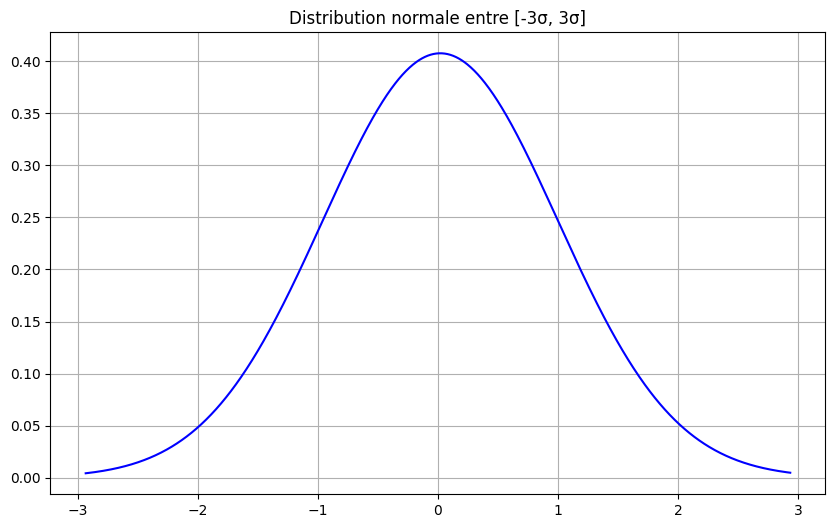

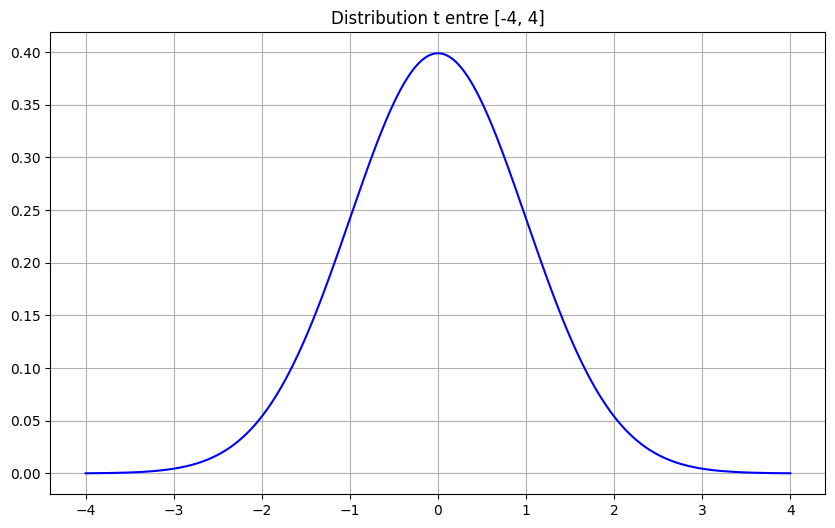

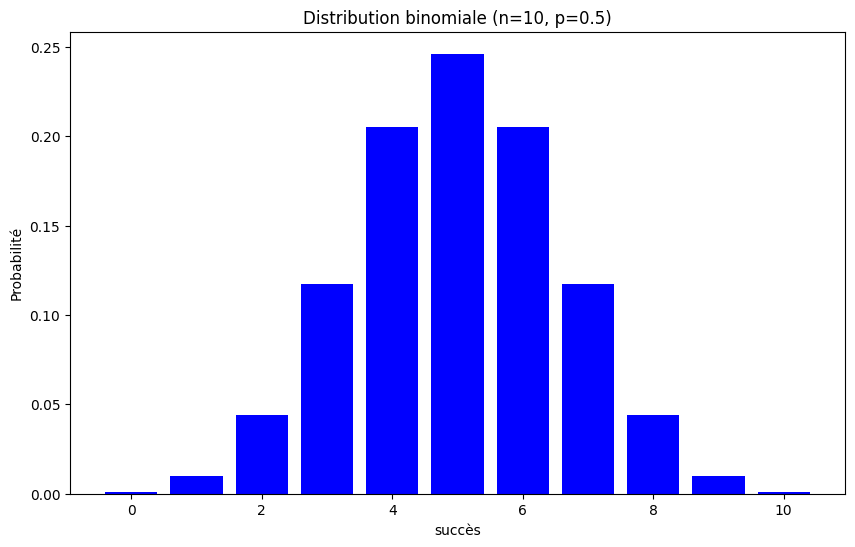

0.6883
0.6914


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, binom

np.random.seed(42)
sample = np.random.normal(loc=0, scale=1, size=1000)
mu = np.mean(sample)
sigma = np.std(sample)

x_normal = np.linspace(-3*sigma, 3*sigma, 1000)
pdf_normal = norm.pdf(x_normal, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x_normal, pdf_normal, label="Distribution normale", color="blue")
plt.title("Distribution normale entre [-3σ, 3σ]")
plt.grid()
plt.show()


x_t = np.linspace(-4, 4, 1000)
pdf_t = t.pdf(x_t, df=len(sample)-1)

plt.figure(figsize=(10, 6))
plt.plot(x_t, pdf_t, label="Distribution t", color="blue")
plt.title("Distribution t entre [-4, 4]")
plt.grid()
plt.show()

n, p = 10, 0.5
k = np.arange(0, n+1)
binom = binom.pmf(k, n, p)

plt.figure(figsize=(10, 6))
plt.bar(k, binom, label="Distribution binomiale", color="blue")
plt.title("Distribution binomiale (n=10, p=0.5)")
plt.xlabel("succès")
plt.ylabel("Probabilité")
plt.show()

z_val, t_val = 0.5, 0.5
prob_z = norm.cdf(z_val, loc=mu, scale=sigma)
prob_t = t.cdf(t_val, df=len(sample)-1)

print(f"{prob_z:.4f}")
print(f"{prob_t:.4f}")

## Tests statistiques ($t$-test et $\chi^2$)

### `Exercice 3`
 Un article scientifique de la revue Materials Engineering (Vol II, No. 4 pp 275-281) décrit ls résultats des test par traction pour l'adhésion sur 22 échantillons  de l'aléation U-700. Les essai de charge sur lequels les échantillons ont eu des défaillances (Mpa) sont montrés sur le tableau ci-après:

| Charge de défaillance (MPa) | 19.8 | 15.4 | 11.4 | 19.5 | 10.1 | 18.5 | 14.1 | 8.8 | 14.9 | 7.9 |
|-----------------------|------|------|------|------|------|------|------|-----|------|-----|
|                       | 17.6 | 13.6 | 7.5  | 12.7 | 16.7 | 11.9 | 15.4 | 11.9| 15.8 | 11.4 |
|                       | 15.4 | 11.4 |      |      |      |      |      |     |      |     |



 - Les données sugèrent que la charge moyenne pour la défaillance excède 10Mpa. À partir de l'information fournie, répondez aux suivantes questions
 - Formulez les hypothèses nulle et alternative et appliquez le test d'hypothèse pertinent afin de rejéter ou non la hypothèse nulle. 

In [24]:
import numpy as np
from scipy.stats import ttest_1samp

failure_loads = [ 19.8, 15.4, 11.4, 19.5, 10.1, 18.5, 14.1, 8.8, 14.9, 7.9,
    17.6, 13.6, 7.5, 12.7, 16.7, 11.9, 15.4, 11.9, 15.8, 11.4,
    15.4, 11.4 ]

µ = 10
 
t_stat, p_value = ttest_1samp(failure_loads, µ)
print(f"Statistique t : {t_stat}")
print(f"p-valeur (unilatérale) : {p_value / 2}")  
 
α = 0.05
if (p_value / 2 <α) and (t_stat > 0):
    print("Rejet de H0 : La charge moyenne dépasse significativement 10 MPa.")
else:
    print("Échec du rejet de H0 : La charge moyenne ne dépasse pas significativement 10 MPa.")

Statistique t : 4.901682101212388
p-valeur (unilatérale) : 3.781272593448241e-05
Rejet de H0 : La charge moyenne dépasse significativement 10 MPa.


### `Exercice 4`

Un sondage a été réalisé au sein d'une université française sur l'opinion des étudiants concernant le changement du budget alloué au programme d'études communes. Les résultats de ce sondage sont présentés dans le tableau ci-dessous.

|                | d'accord  | pas d'accord | Total |
|----------------|------|------|-------|
| **Première Année**       | 120   | 80   | 200   |
| **Deuxième Année**       | 70    | 130  | 200   |
| **Troisième Année**      | 60   | 70    | 130   |
| **Quatrième Année**      | 40   | 60    | 100   |

- Formulez les hypothèses nulle ($H_0$) et alternative ($H_1$).
- Que déduisez vous par rapport à l'indépendance du sondage. Pour ceci utilisez un $\alpha =0.05$.
- Calculez la p-value à l'aide de deux méthodes : la méthode SciPy et la méthode basée sur la distribution de densité cumulée $\chi^2$. Pour ce calcul, utilisez les valeurs de la statistique de test et du degré de liberté obtenues avec SciPy.

## Régression Linéaire simple et multiple 

### `Exercice 5`

Le tableau ci-dessous correspond à la performance d'essence dans la route par rapport aux caractéristiques du moteur. Avec ces données, répondre aux questions suivantes:

- Ajuster un modèle linéaire simple qui mette en relation le nombre de miles parcourus par gallon de carburant consommé par le moteur en marche avec la cylindrée du moteur. Pour ce faire, créez un fichier Excel ou CSV, chargez-le et utilisez les formules pour calculer les coefficients de la régression linéaire simple. Ensuite, calculez les prédictions pour $x = 150$ et $x =200$
- Utiliser les bibliothèques SciPy, statsmodels et scikit_learn pour ajuster un modèle linéaire simple sur le même ensemble de données. Comparez les résultats obtenus par les trois bibliothèques et la fonction créée précédemment.
- Calculez les prédictions pour $x = 150$ et $x = 200$ en utilisant les bibliothèques scikit-learn et statsmodels, puis comparez les valeurs obtenues avec celles du premier point. 

  
| Make       | Model     | MPG (highway) | Engine Displacement (in³) | Make       | Model    | MPG (highway) | Engine Displacement (in³) |
|------------|-----------|---------------|---------------------------|------------|----------|---------------|---------------------------|
| Acura      | Legend    | 30            | 97                        | Ford       | Taurus   | 27            | 153                       |
| BMW        | 735i      | 19            | 209                       | Ford       | Tempo    | 33            | 90                        |
| Buick      | Regal     | 29            | 173                       | Honda      | Accord   | 30            | 119                       |
| Chevrolet  | Cavalier  | 32            | 121                       | Mazda      | RX-7     | 23            | 80                        |
| Chevrolet  | Celebrity | 30            | 151                       | Mercedes   | 260E     | 24            | 159                       |
| Chrysler   | Conquest  | 24            | 156                       | Mercury    | Tracer   | 29            | 97                        |
| Dodge      | Aries     | 30            | 135                       | Nissan     | Maxima   | 26            | 181                       |
| Dodge      | Dynasty   | 28            | 181                       | Oldsmobile | Cutlass  | 29            | 173                       |
| Ford       | Escort    | 31            | 114                       | Plymouth   | Laser    | 37            | 122                       |
| Ford       | Mustang   | 25            | 302                       | Pontiac    | Grand Prix | 29          | 173                       |


#### Fonction Régression à partir des formules 
 Pour programmer cette fonction, nous allons utiliser la formule que définie la pente de la droite en régression simple $\beta_1 = \frac {Cov(X, Y)}{Var(X)}$. Pour ce faire, il faut d'abord montrer comment la matrice de covariance est obtenue  

<div style="text-align: center;">
$
\text{Cov}(X, Y) = \begin{pmatrix}
\text{var}(x) & \text{cov}(x, y) \\
\text{cov}(x, y) & \text{var}(y)
\end{pmatrix}
$
</div>


En observant cette matrice symétrique, il nous faut extraire la valeur $Cov(x, y)$ de façon à obtenir la pente de la droite. 

In [43]:
import pandas as pd
import numpy as np

data = pd.read_csv('file.csv')
#print(data)

x = data['Engine Displacement (in³)']
# print(x)
y = data['MPG (highway)']

x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

b0 = y_mean - b1 * x_mean

print(f"Coefficients de la régression linéaire simple: b0 = {b0}, b1 = {b1}")

x_values = [150, 200]
predictions = [b0 + b1 * x_val for x_val in x_values]
print(f"Prédictions pour x = 150 et x = 200: {predictions}")

0      97
1     209
2     173
3     121
4     151
5     156
6     135
7     181
8     114
9     302
10    153
11     90
12    119
13     80
14    159
15     97
16    181
17    173
18    122
19    173
Name: Engine Displacement (in³), dtype: int64
Coefficients de la régression linéaire simple: b0 = 33.53478390129696, b1 = -0.03539707904418596
Prédictions pour x = 150 et x = 200: [28.225222044669067, 26.45536809245977]


#### Code python avec statsmodels

In [44]:
%pip install statsmodels
import statsmodels.api as sm

x_with_const = sm.add_constant(x)

model = sm.OLS(y, x_with_const).fit()

print(f"statsmodels - Coefficients: {model.params}")


predictions_statsmodels = model.predict([1, 150]), model.predict([1, 200])
print(f"statsmodels - Prédictions pour x = 150 et x = 200: {predictions_statsmodels}")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
statsmodels - Coefficients: const                        33.534784
Engine Displacement (in³)    -0.035397
dtype: float64


#### Code python avec scikit-learn

In [42]:
%pip install scikit-learn
from sklearn.linear_model import LinearRegression

x_reshaped = x.values.reshape(-1, 1)

model = LinearRegression().fit(x_reshaped, y)

print(f"scikit-learn - Coefficients: intercept = {model.intercept_}, slope = {model.coef_[0]}")

predictions_sklearn = model.predict(np.array(x_values).reshape(-1, 1))
print(f"scikit-learn - Prédictions pour x = 150 et x = 200: {predictions_sklearn}")

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
scikit-learn - Coefficients: intercept = 33.53478390129696, slope = -0.03539707904418596
scikit-learn - Prédictions pour x = 150 et x = 200: [28.22522204 26.45536809]


#### Code Python avec SciPy

In [37]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"SciPy - Coefficients: intercept = {intercept}, slope = {slope}")

predictions_scipy = [intercept + slope * x_val for x_val in x_values]
print(f"SciPy - Prédictions pour x = 150 et x = 200: {predictions_scipy}")


SciPy - Coefficients: intercept = 33.53478390129696, slope = -0.035397079044185945
SciPy - Prédictions pour x = 150 et x = 200: [28.22522204466907, 26.45536809245977]


### Régression linéaire multiple 

#### `Exercice 6`
La résistance à la traction d'un lien métallique est une caractéristique importante. Le tableau ci-dessous donne des informations sur la force de traction $y$, la hauteur de la filière $x_1$, la hauteur du poteau $x_2$, la hauteur de la boucle $x_3$, la longueur du fil $x_4$, la largeur du lien sur la matrice $x_5$ et la largeur du lien sur le poteau $x_6$.

|   y  |  x₁  |  x₂  |  x₃  |   x₄   |  x₅  |  x₆  |
|------|------|------|------|--------|------|------|
|  8.0 |  5.2 | 19.6 | 29.6 |  94.9  |  2.1 |  2.3 |
|  8.3 |  5.2 | 19.8 | 32.4 |  89.7  |  2.1 |  1.8 |
|  8.5 |  5.8 | 19.6 | 31.0 |  96.2  |  2.0 |  2.0 |
|  8.8 |  6.4 | 19.4 | 32.4 |  95.6  |  2.2 |  2.1 |
|  9.0 |  5.8 | 18.6 | 28.6 |  86.5  |  2.0 |  1.8 |
|  9.3 |  5.2 | 18.8 | 30.6 |  84.5  |  2.1 |  2.1 |
|  9.3 |  5.6 | 20.4 | 32.4 |  88.8  |  2.2 |  1.9 |
|  9.5 |  6.0 | 19.0 | 32.6 |  85.7  |  2.1 |  1.9 |
|  9.8 |  5.2 | 20.8 | 32.2 |  93.6  |  2.3 |  2.1 |
| 10.0 |  5.8 | 19.9 | 31.8 |  86.0  |  2.1 |  1.8 |
| 10.3 |  6.4 | 18.0 | 32.6 |  87.1  |  2.0 |  1.6 |
| 10.5 |  6.0 | 20.6 | 33.4 |  93.1  |  2.1 |  2.1 |
| 10.8 |  6.2 | 20.2 | 31.8 |  83.4  |  2.2 |  2.1 |
| 11.0 |  6.2 | 20.2 | 32.4 |  94.5  |  2.1 |  1.9 |
| 11.3 |  6.2 | 19.2 | 31.4 |  83.4  |  1.9 |  1.8 |
| 11.5 |  5.6 | 17.0 | 33.2 |  85.2  |  2.1 |  2.1 |
| 11.8 |  6.0 | 19.8 | 35.4 |  84.1  |  2.0 |  1.8 |
| 12.3 |  5.8 | 18.8 | 34.0 |  86.9  |  2.1 |  1.8 |
| 12.5 |  5.6 | 18.6 | 34.2 |  83.0  |  1.9 |  2.0 |

- En utilisant le jeux de données ci-dessus, ajustez un modèle linéaire multiple à l'aide des bibliothèques statsmodels et scikit-learn.
  Ensuite, comparez les résultats issus des deux méthodes
- Calculez la prediction pour $x_1=6,x_2=21.2,x_3=30,x_4=90,x_5=2.0,x_6=1.5$ à l'aide des modèles obtenus avec statsmodels et scikit-learn.
- Que pensez vous de la valeur du $r^2$
- Créer une fonction à l'aide des équations normales pour obtenir les coefficients de régression multiple. Ensuite, calculez le coefficient de détermination $r^2$ ainsi que les prédictions pour $x_1=6, x_2=21,2, x_3=30, x_4=90, x_5=2,0, x_6=1,5$ et comparez les résultats avec ceux obtenus précédemment.

### Code python à l'aide de statsmodels

#### Code python à l'aide de scikit-learn

## Régression linéaire avec des équations normales
